## Plotting percentiles

In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import brfss

import thinkstats2
import thinkplot

In [2]:
df = brfss.ReadBrfss(nrows=None)

In [5]:
cleaned = df.dropna(subset=['htm3', 'wtkg2'])

In [6]:
cleaned

,age,sex,wtyrago,finalwt,wtkg2,htm3
0,82.0,2,76.363636,185.870345,70.91,157.0
1,65.0,2,72.727273,126.603027,72.73,163.0
3,61.0,1,73.636364,517.926275,73.64,170.0
4,26.0,1,88.636364,1252.624630,88.64,185.0
5,42.0,1,118.181818,415.161314,109.09,183.0
6,40.0,2,50.000000,422.810541,50.00,157.0
7,24.0,2,131.818182,1280.585980,122.73,178.0
8,37.0,1,87.727273,1245.060440,90.00,178.0
9,65.0,1,77.272727,382.738158,77.27,173.0
10,28.0,1,52.272727,3131.561570,63.64,170.0


In [7]:
bins = np.arange(135,210,5)
indices = np.digitize(cleaned.htm3, bins)

In [9]:
indices, len(indices)

(array([5, 6, 8, ..., 9, 5, 9]), 395832)

In [10]:
groups = cleaned.groupby(indices)

In [11]:
for i, group in groups:
    print(i, len(group))

0 305
1 228
2 477
3 2162
4 18759
5 45761
6 70610
7 72138
8 61725
9 49938
10 43555
11 20077
12 7784
13 1777
14 405
15 131


In [12]:
mean_heights = [group.htm3.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.wtkg2) for i, group in groups]

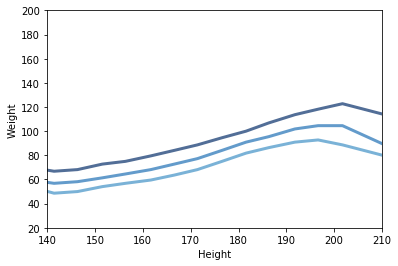

In [13]:
for percent in [75, 50, 25]:
    weight_percentiles = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(mean_heights, weight_percentiles, label=label)
    
thinkplot.Config(xlabel='Height', ylabel='Weight', axis=[140,210,20,200], legend=False)

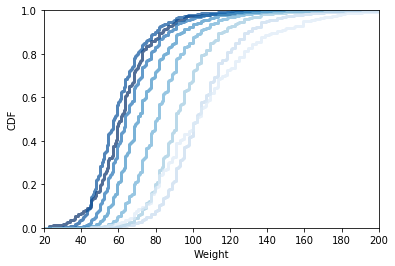

In [15]:
bins = np.arange(140, 210, 10)
indices = np.digitize(cleaned.htm3, bins)
groups = cleaned.groupby(indices)
cdfs = [thinkstats2.Cdf(group.wtkg2) for i, group in groups]

thinkplot.PrePlot(len(cdfs))
thinkplot.Cdfs(cdfs)
thinkplot.Config(xlabel='Weight', ylabel='CDF', axis=[20,200,0,1], legend=False)